<h1> Importing Libraries



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
#loading data
df = pd.read_csv('/content/sample_data/Current_available_property_2.csv')

df.head()

,Property_name,Total_rooms,Accomodation_size,Property_size,Location,Rent_per_month
0,"Lovely flat, Paris St-Honoré",1 Room,2 adults,26 m²,"Paris, 1st Arrondissement","€1,950"
1,Best location in Paris and calm,3 Rooms,4 adults,73 m²,"Paris, 1st Arrondissement","€2,850"
2,Studio - 37m² - Bourse,1 Room,2 adults,37 m²,"Paris, 1st Arrondissement","€2,031"
3,Fully equipped flat for two or three people in...,2 Rooms,3 adults,40 m²,"Paris, 1st Arrondissement","€3,666"
4,Bright & cozy flat with a balcony in Montorgueil,1 Room,2 adults,50 m²,"Paris, 1st Arrondissement","€3,300"


In [5]:
df.describe(include='all')

,Property_name,Total_rooms,Accomodation_size,Property_size,Location,Rent_per_month
count,1104,1104,1104,1104,1104,1104
unique,672,7,11,110,20,369
top,Private bedroom in shared flat,2 Rooms,2 adults,50 m²,"Paris, 16th Arrondissement","€2,000"
freq,8,442,571,57,150,37


In [6]:
# Display the data types and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Property_name      1104 non-null   object
 1   Total_rooms        1104 non-null   object
 2   Accomodation_size  1104 non-null   object
 3   Property_size      1104 non-null   object
 4   Location           1104 non-null   object
 5   Rent_per_month     1104 non-null   object
dtypes: object(6)
memory usage: 51.9+ KB


<h3> There are no missing values</h3>

<h2> Data Wrangling </h2>

In [7]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   property_name      1104 non-null   object
 1   total_rooms        1104 non-null   object
 2   accomodation_size  1104 non-null   object
 3   property_size      1104 non-null   object
 4   location           1104 non-null   object
 5   rent_per_month     1104 non-null   object
dtypes: object(6)
memory usage: 51.9+ KB


In [8]:
# Converting data types and handling units
def extract_numbers(text):
    return int(re.findall(r'\d+', text)[0])

# Convert 'Property_size', 'Total_rooms', 'Accomodation_size', 'Rent_per_month' to numerical values
df['property_size'] = df['property_size'].str.replace('m²', '').astype(float)
df['total_rooms'] = df['total_rooms'].apply(extract_numbers)
df['accomodation_size'] = df['accomodation_size'].apply(extract_numbers)
df['rent_per_month'] = df['rent_per_month'].str.replace('€', '').str.replace(',', '').astype(float)


df['location'] = df['location'].str.replace('Paris,', '').astype(str)
df = df.rename(columns={'property_name': 'property_description'})
# Display the updated dataset
df.head()

,property_description,total_rooms,accomodation_size,property_size,location,rent_per_month
0,"Lovely flat, Paris St-Honoré",1,2,26.0,1st Arrondissement,1950.0
1,Best location in Paris and calm,3,4,73.0,1st Arrondissement,2850.0
2,Studio - 37m² - Bourse,1,2,37.0,1st Arrondissement,2031.0
3,Fully equipped flat for two or three people in...,2,3,40.0,1st Arrondissement,3666.0
4,Bright & cozy flat with a balcony in Montorgueil,1,2,50.0,1st Arrondissement,3300.0


<h3> Visualizations</h3>

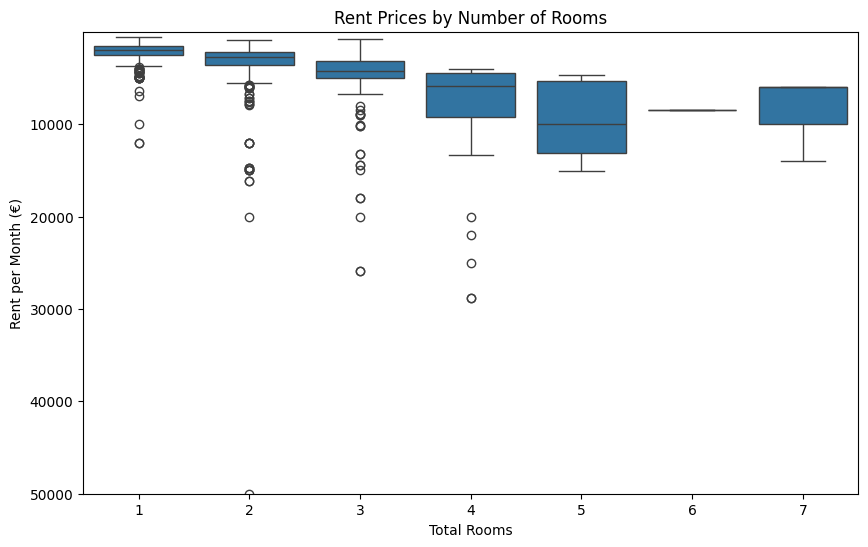

In [9]:
# Boxplot of Rent Prices by Number of Rooms
plt.figure(figsize=(10, 6))
plt.ylim(50000)
sns.boxplot(x='total_rooms', y='rent_per_month', data=df)
plt.title('Rent Prices by Number of Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('Rent per Month (€)')
plt.show()

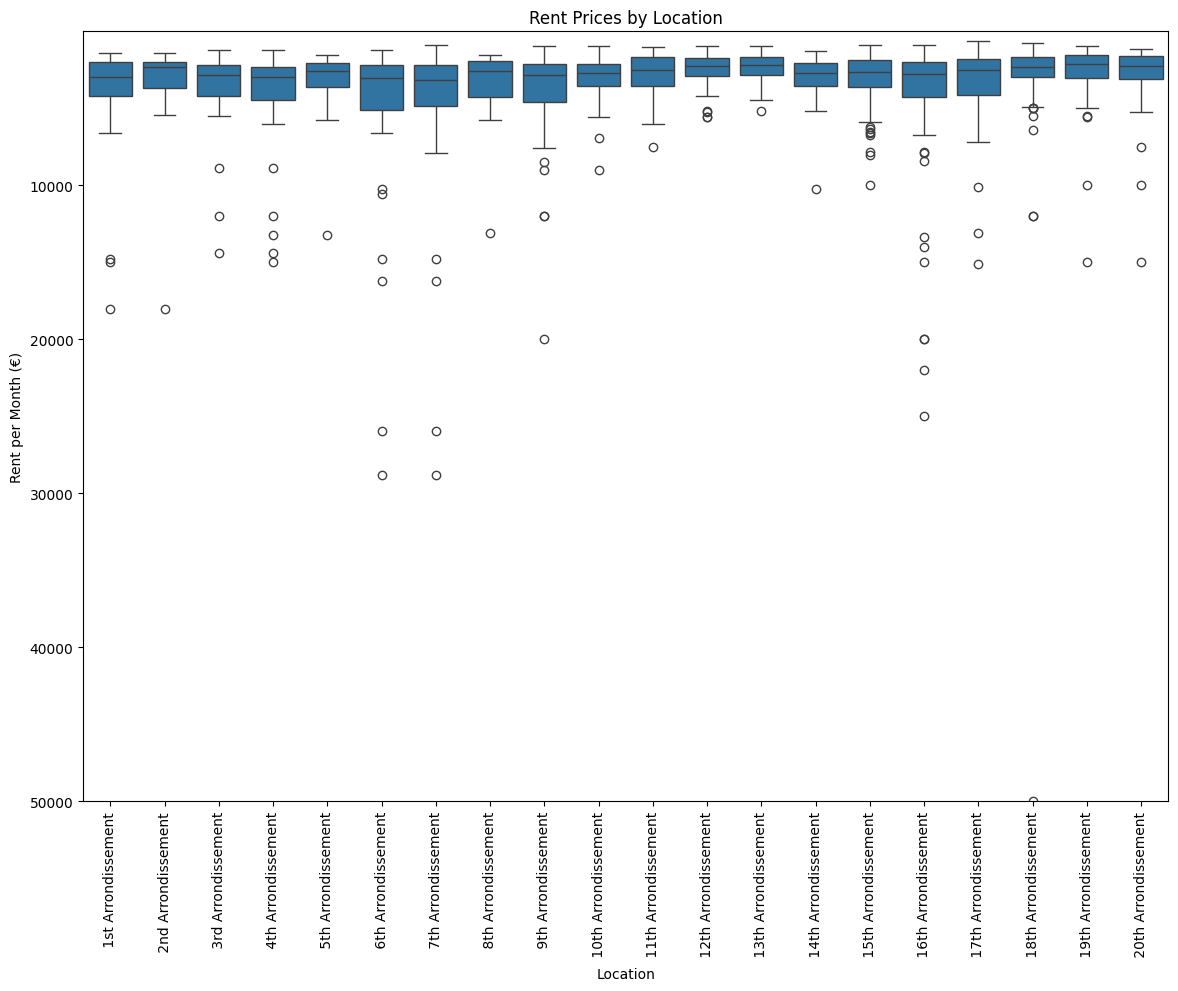

In [10]:
# Boxplot of Rent Prices by Location
plt.figure(figsize=(14, 10))
plt.ylim(50000)
sns.boxplot(x='location', y='rent_per_month', data=df)
plt.title('Rent Prices by Location')
plt.xlabel('Location')
plt.ylabel('Rent per Month (€)')
plt.xticks(rotation=90)
plt.show()

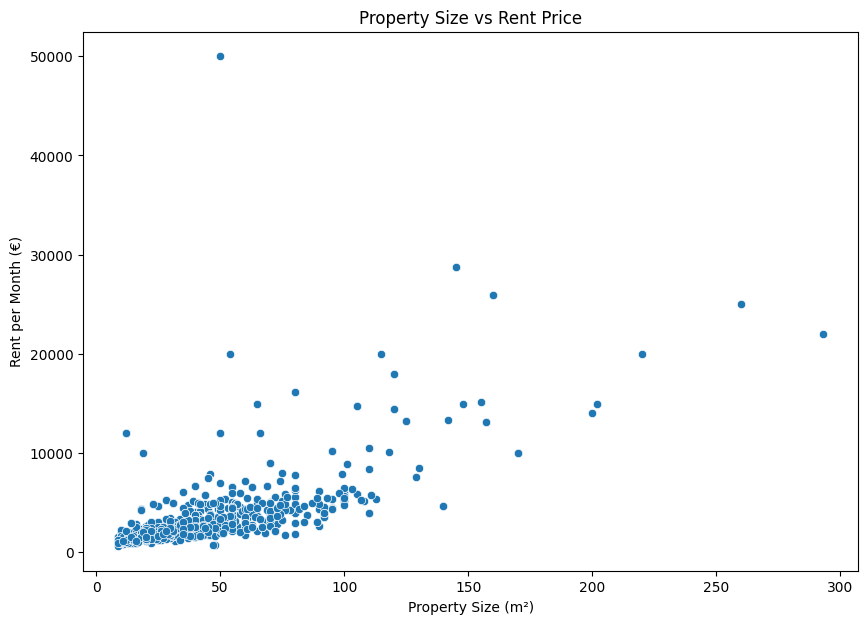

In [11]:
# Relationship between Property Size and Rent Price
plt.figure(figsize=(10, 7))
sns.scatterplot(x='property_size', y='rent_per_month', data=df)
plt.title('Property Size vs Rent Price')
plt.xlabel('Property Size (m²)')
plt.ylabel('Rent per Month (€)')
plt.show()

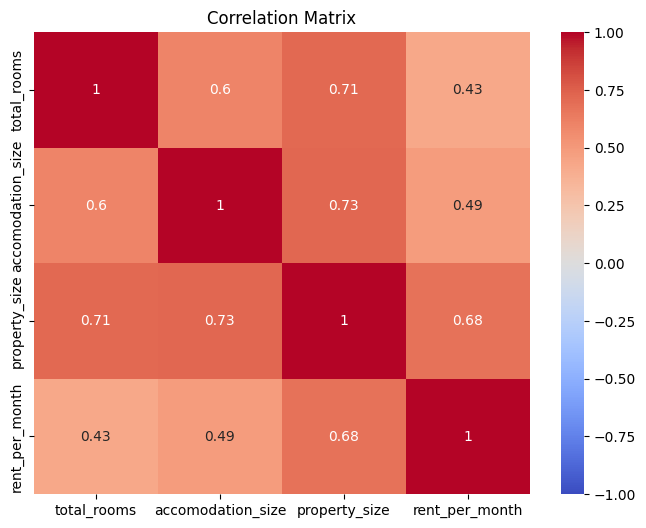

In [12]:
# Compute the correlation matrix
corr = df[['total_rooms', 'accomodation_size', 'property_size', 'rent_per_month']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [13]:
df.to_csv('cleaned_dataset.csv', index=False)


In [14]:
from google.colab import files
files.download('cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>